In [2]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory paths
data_dir = '/kaggle/input/arstbdsl/data'
img_size = (224, 224)
batch_size = 32

# Create ImageDataGenerator instances for train, validation, and test sets with augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split the data into 80% train and 20% validation
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 9504 images belonging to 38 classes.
Found 2360 images belonging to 38 classes.


In [16]:
from tensorflow.keras.applications import Xception
# Define the Xception base model
base_model = Xception(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Create three instances of the base model with different inputs
input_1 = base_model.input
output_1 = base_model.output
input_2 = base_model.input
output_2 = base_model.output
input_3 = base_model.input
output_3 = base_model.output

# Add global average pooling layer and dense layers for each model
output_1 = GlobalAveragePooling2D()(output_1)
output_1 = Dense(512, activation='relu')(output_1)
output_1 = Dropout(0.5)(output_1)
output_1 = Dense(32, activation='relu')(output_1)
output_1 = Dense(38, activation='softmax')(output_1)

output_2 = GlobalAveragePooling2D()(output_2)
output_2 = Dense(512, activation='relu')(output_2)
output_2 = Dropout(0.5)(output_2)
output_2 = Dense(32, activation='relu')(output_2)
output_2 = Dense(38, activation='softmax')(output_2)

output_3 = GlobalAveragePooling2D()(output_3)
output_3 = Dense(512, activation='relu')(output_3)
output_3 = Dropout(0.5)(output_3)
output_3 = Dense(32, activation='relu')(output_3)
output_3 = Dense(38, activation='softmax')(output_3)

# Create three separate models
model_1 = Model(inputs=input_1, outputs=output_1)
model_2 = Model(inputs=input_2, outputs=output_2)
model_3 = Model(inputs=input_3, outputs=output_3)

# Compile the model
model_1.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model_3.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)

# Train the model
history = model_1.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)
# Train the model
history = model_2.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)
# Train the model
history = model_3.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20


W0000 00:00:1718890230.845193     229 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.0341 - loss: 3.6418

W0000 00:00:1718890358.349160     226 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718890368.166628     229 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 179s 463ms/step - accuracy: 0.0341 - loss: 3.6417 - val_accuracy: 0.0559 - val_loss: 3.5922 - learning_rate: 1.0000e-05
Epoch 2/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 136s 449ms/step - accuracy: 0.0703 - loss: 3.5357 - val_accuracy: 0.1432 - val_loss: 3.2935 - learning_rate: 1.0000e-05
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 136s 448ms/step - accuracy: 0.1664 - loss: 3.1497 - val_accuracy: 0.2720 - val_loss: 2.6703 - learning_rate: 1.0000e-05
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 136s 448ms/step - accuracy: 0.3053 - loss: 2.5590 - val_accuracy: 0.4822 - val_loss: 2.0361 - learning_rate: 1.0000e-05
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 136s 447ms/step - accuracy: 0.4937 - loss: 1.9562 - val_accuracy: 0.6369 - val_loss: 1.5020 - learning_rate: 1.0000e-05
Epoch 6/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 136s 448ms/step - accuracy: 0.6410 - loss: 1.4580 - val_accuracy: 0.7381 - val_loss: 1.1400 - learning_rate: 1.0000e-05
Epoch 7/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 136s 447ms/

W0000 00:00:1718893002.327586     229 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.1287 - loss: 3.3562

W0000 00:00:1718893129.803182     227 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 178s 463ms/step - accuracy: 0.1292 - loss: 3.3550 - val_accuracy: 0.6614 - val_loss: 2.1047 - learning_rate: 1.0000e-05
Epoch 2/20


W0000 00:00:1718893139.623707     229 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 136s 447ms/step - accuracy: 0.6248 - loss: 1.9700 - val_accuracy: 0.8250 - val_loss: 1.1422 - learning_rate: 1.0000e-05
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 136s 447ms/step - accuracy: 0.8481 - loss: 1.0669 - val_accuracy: 0.8703 - val_loss: 0.7553 - learning_rate: 1.0000e-05
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 135s 446ms/step - accuracy: 0.9279 - loss: 0.6201 - val_accuracy: 0.8780 - val_loss: 0.5903 - learning_rate: 1.0000e-05
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 135s 446ms/step - accuracy: 0.9506 - loss: 0.3941 - val_accuracy: 0.8788 - val_loss: 0.5481 - learning_rate: 1.0000e-05
Epoch 1/20


W0000 00:00:1718893725.155601     226 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.1622 - loss: 3.3147

W0000 00:00:1718893852.887608     227 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 180s 464ms/step - accuracy: 0.1627 - loss: 3.3135 - val_accuracy: 0.6631 - val_loss: 2.0185 - learning_rate: 1.0000e-05
Epoch 2/20


W0000 00:00:1718893862.679518     226 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 136s 448ms/step - accuracy: 0.6512 - loss: 1.8848 - val_accuracy: 0.7941 - val_loss: 1.1366 - learning_rate: 1.0000e-05
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 136s 448ms/step - accuracy: 0.8170 - loss: 1.0778 - val_accuracy: 0.8398 - val_loss: 0.8146 - learning_rate: 1.0000e-05
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 136s 448ms/step - accuracy: 0.8899 - loss: 0.6614 - val_accuracy: 0.8585 - val_loss: 0.6872 - learning_rate: 1.0000e-05
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 136s 448ms/step - accuracy: 0.9180 - loss: 0.4803 - val_accuracy: 0.8686 - val_loss: 0.6179 - learning_rate: 1.0000e-05


Found 11864 images belonging to 38 classes.
Model Accuracy: 95.01%
  2/371 ━━━━━━━━━━━━━━━━━━━━ 50s 136ms/step

W0000 00:00:1718894577.720085     227 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


371/371 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step


W0000 00:00:1718894621.297681     229 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Model Accuracy: 75.30%
  2/371 ━━━━━━━━━━━━━━━━━━━━ 51s 138ms/step

W0000 00:00:1718894666.200622     229 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


371/371 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step


W0000 00:00:1718894709.565934     226 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Model Accuracy: 74.27%
  2/371 ━━━━━━━━━━━━━━━━━━━━ 47s 130ms/step

W0000 00:00:1718894754.493499     229 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


371/371 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step


W0000 00:00:1718894797.889509     226 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Ensemble Model Accuracy: 0.9507754551584626
Ensemble Model Loss: 1.3070296098788579


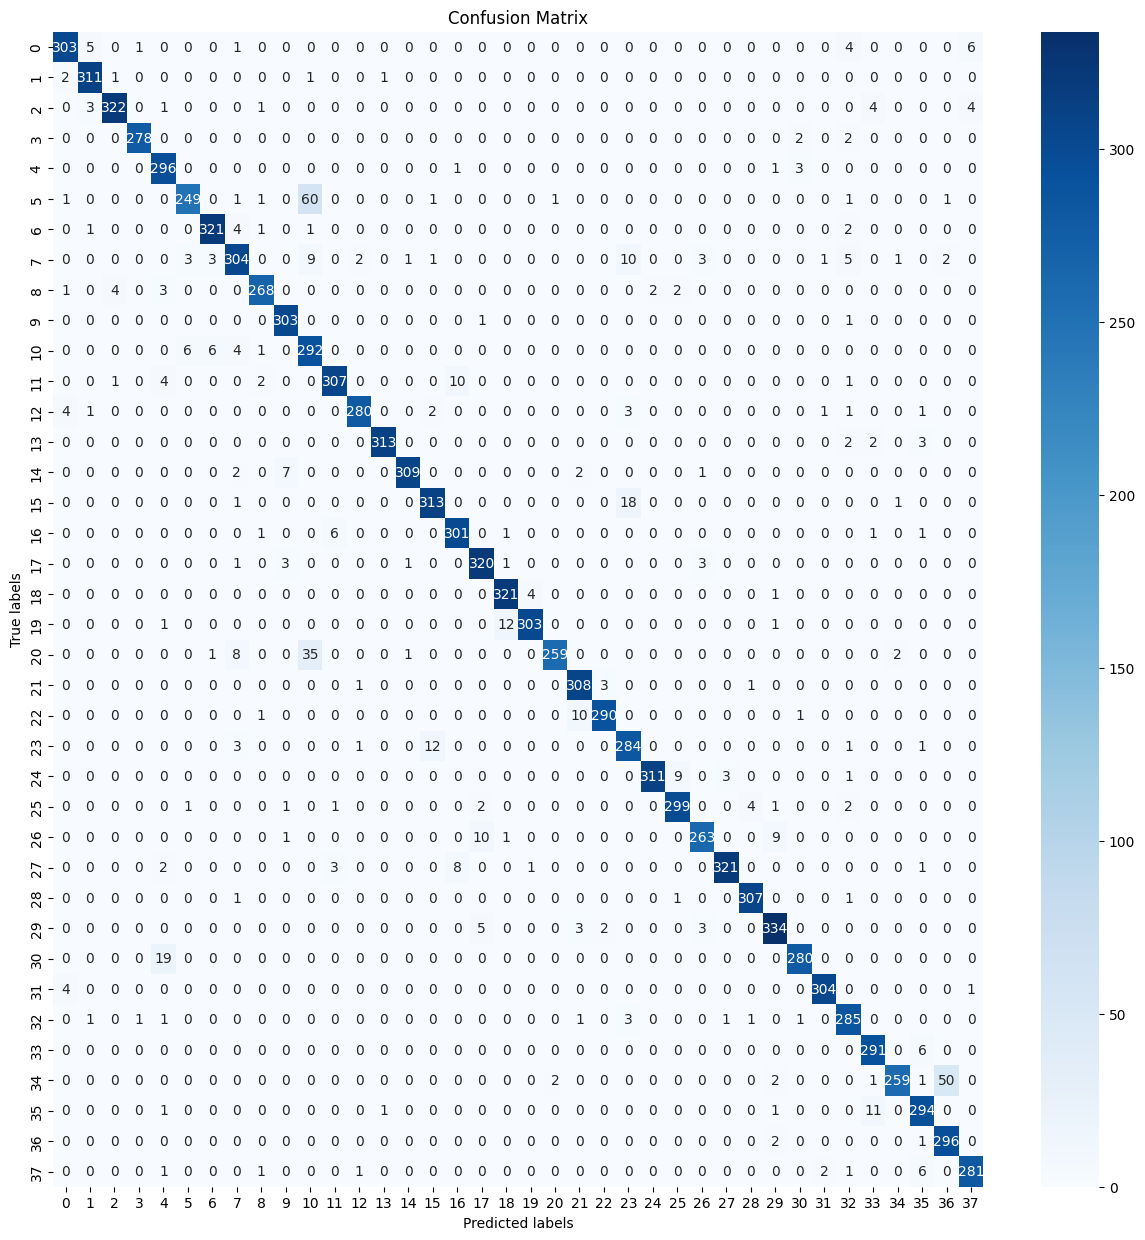

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       320
           1       0.97      0.98      0.97       316
           2       0.98      0.96      0.97       335
           3       0.99      0.99      0.99       282
           4       0.90      0.98      0.94       301
           5       0.96      0.79      0.87       316
           6       0.97      0.97      0.97       330
           7       0.92      0.88      0.90       345
           8       0.97      0.96      0.96       280
           9       0.96      0.99      0.98       305
          10       0.73      0.94      0.83       309
          11       0.97      0.94      0.96       325
          12       0.98      0.96      0.97       293
          13       0.99      0.98      0.99       320
          14       0.99      0.96      0.98       321
          15       0.95      0.94      0.95       333
          16       0.94      0.97      0.95       311
    

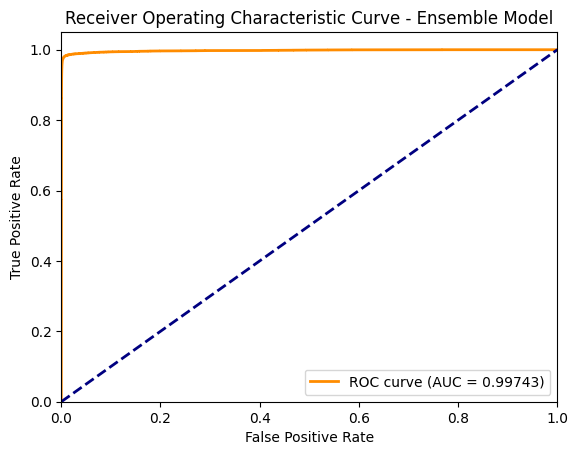

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score
import numpy as np
import tensorflow as tf

# Assuming you have multiple models in a list
models = [model_1, model_2, model_3]  # Replace with your actual model variables

# Recheck Data Generators
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/arstbdsl/data',  # Make sure this directory is correct
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Ensure no shuffling for consistency in predictions
)

# Evaluate each model on the test set and average their predictions
ensemble_predictions = None
test_loss = 0

for model in models:
    model_loss, model_acc = model.evaluate(test_generator, verbose=0)
    print(f'Model Accuracy: {model_acc * 100:.2f}%')
    
    # Summing losses for the ensemble
    test_loss += model_loss
    
    predictions = model.predict(test_generator)
    if ensemble_predictions is None:
        ensemble_predictions = predictions
    else:
        ensemble_predictions += predictions

# Average the predictions
ensemble_predictions /= len(models)
test_loss /= len(models)

# Evaluate the ensemble model
y_true = test_generator.classes
y_pred = np.argmax(ensemble_predictions, axis=1)

# Calculate accuracy score
accuracy = accuracy_score(y_true, y_pred)
print("Ensemble Model Accuracy:", accuracy)

# Print average loss for the ensemble
print("Ensemble Model Loss:", test_loss)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Calculate overall ROC AUC score
roc_auc = roc_auc_score(tf.keras.utils.to_categorical(y_true), ensemble_predictions, average='macro')
print("Overall ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(tf.keras.utils.to_categorical(y_true).ravel(), ensemble_predictions.ravel())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve - Ensemble Model')
plt.legend(loc="lower right")
plt.show()